## Подготовка данных

Используя скрипт ниже - скачайте изображения двух любых классов на ваш выбор, для которых вы будете обучать классификатор. Для этого - откройте Консоль разработчика в браузере и вставьте указанный код. Можно использовать любую структуру сети на ваш выбор

In [30]:
# urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
# window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n'))); (скрипт взят у Джереми)

In [1]:
from matplotlib.pylab import plt
%matplotlib inline
from PIL import Image
import requests
from io import BytesIO
import numpy as np

In [2]:
example_url = 'https://s10.stc.all.kpcdn.net/share/i/12/10317655/inx960x640.jpg'

In [3]:
response = requests.get(example_url)
img = Image.open(BytesIO(response.content))

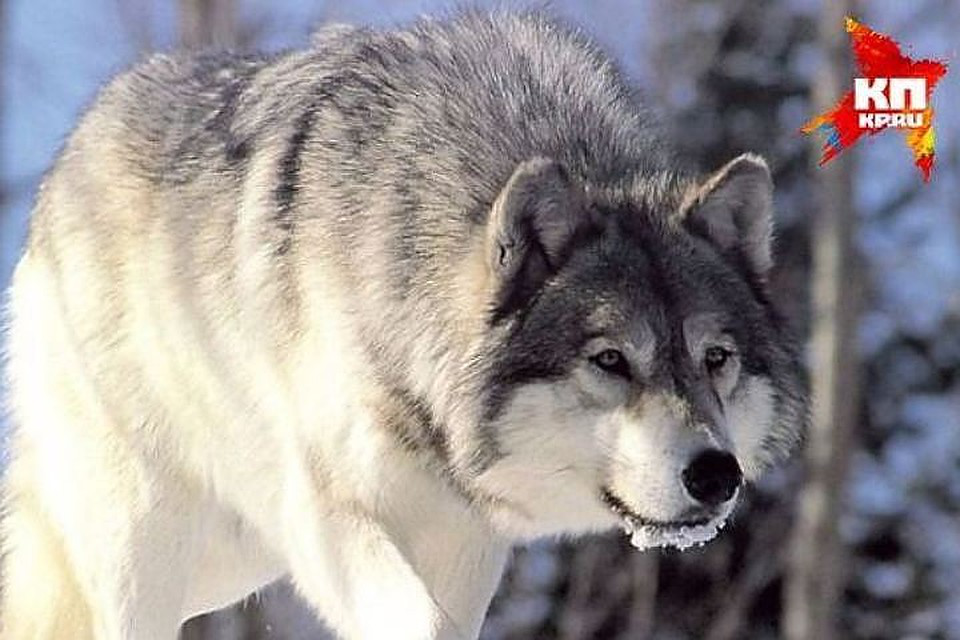

In [4]:
img

In [5]:
img_rsz = img.resize(size=(224,224))

In [6]:
np.array(img_rsz)

array([[[108, 114, 138],
        [120, 130, 165],
        [129, 148, 190],
        ...,
        [116, 120, 145],
        [124, 128, 157],
        [132, 132, 168]],

       [[113, 119, 143],
        [123, 133, 168],
        [131, 150, 192],
        ...,
        [117, 123, 149],
        [125, 128, 159],
        [129, 132, 167]],

       [[116, 122, 146],
        [126, 136, 171],
        [134, 153, 195],
        ...,
        [119, 124, 154],
        [125, 130, 162],
        [128, 132, 167]],

       ...,

       [[234, 217, 191],
        [247, 232, 203],
        [246, 233, 201],
        ...,
        [104, 107, 124],
        [111, 115, 140],
        [116, 122, 148]],

       [[244, 227, 199],
        [245, 229, 203],
        [247, 233, 206],
        ...,
        [ 95,  98, 113],
        [105, 110, 132],
        [111, 115, 140]],

       [[240, 223, 193],
        [242, 226, 200],
        [247, 233, 206],
        ...,
        [ 88,  90, 105],
        [ 95,  97, 118],
        [100, 104, 129]]